<a href="https://colab.research.google.com/github/dqj5182/egyptian_hieroglyph_recognition_convnet/blob/main/Egyptian_model_with_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Connecting and Mounting to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
#!pip install split-folders

In [ ]:
# define training and test data directories
# data_dir = '/content/drive/MyDrive/FinalEdgeDetectedDataset/'
data_dir = '/content/drive/MyDrive/EgyptianHieroglyphDataset/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

In [ ]:
hieroglyph_for_train = []

for name in os.listdir('/content/drive/MyDrive/EgyptianHieroglyphDataset/'):
  path, dirs, files = next(os.walk("/content/drive/MyDrive/EgyptianHieroglyphDataset/"+name))
  file_count = len(files)
  if file_count > 100:
    print(name, file_count)
    hieroglyph_for_train.append(name)

E34 122
D21 183
X1 232
V31 133
S29 265
O50 106
I9 146
G17 195
M17 364
N35 448
G43 197


In [ ]:
#import splitfolders

#splitfolders.ratio(data_dir, output=data_dir, seed=1337, ratio=(.8, 0,0.2)) 

In [ ]:
# print(hieroglyph_for_train)

In [ ]:
import os, os.path
import shutil, sys
'''
for name in os.listdir('/content/drive/MyDrive/EgyptianHieroglyphDataset/train/'):
  if name in hieroglyph_for_train:
    pass
  else:
    shutil.rmtree('/content/drive/MyDrive/EgyptianHieroglyphDataset/train/'+name)

for name in os.listdir('/content/drive/MyDrive/EgyptianHieroglyphDataset/test/'):
  if name in hieroglyph_for_train:
    pass
  else:
    shutil.rmtree('/content/drive/MyDrive/EgyptianHieroglyphDataset/test/'+name)
'''

"\nfor name in os.listdir('/content/drive/MyDrive/EgyptianHieroglyphDataset/train/'):\n  if name in hieroglyph_for_train:\n    pass\n  else:\n    shutil.rmtree('/content/drive/MyDrive/EgyptianHieroglyphDataset/train/'+name)\n\nfor name in os.listdir('/content/drive/MyDrive/EgyptianHieroglyphDataset/test/'):\n  if name in hieroglyph_for_train:\n    pass\n  else:\n    shutil.rmtree('/content/drive/MyDrive/EgyptianHieroglyphDataset/test/'+name)\n"

In [ ]:
# classes are folders in each directory with these names
classes = []

for filename in os.listdir(train_dir):
    classes.append(filename)

classes.sort()
# CLASSES: 

In [ ]:
print(classes)

['D21', 'E34', 'G17', 'G43', 'I9', 'M17', 'N35', 'O50', 'S29', 'V31', 'X1']


In [ ]:
# Generate more training data from data augmentation
data_transform_main = transforms.Compose([
                            transforms.ToTensor(),
                            #transforms.RandomApply([transforms.RandomHorizontalFlip()]),
                            #transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0, hue=0)]),
                            #transforms.RandomRotation(degrees=(-30, 30)),
                            #transforms.RandomHorizontalFlip(p = 0.5),
                            #transforms.RandomAffine(degrees = 0, translate=(.1, .1)),
                            #transforms.RandomErasing(p=0.1, scale=(0.05, 0.05), ratio=(0.3, 3.3), value=0, inplace=False),
                            #transforms.RandomApply([transforms.ColorJitter()]),
                            transforms.Normalize((0.5,), (0.5,))
                        ])

# Generate more training data from data augmentation
data_transform_more = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.RandomApply([transforms.RandomHorizontalFlip()]),
                            transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0, hue=0)]),
                            transforms.RandomRotation(degrees=(-30, 30)),
                            transforms.RandomHorizontalFlip(p = 0.5),
                            transforms.RandomAffine(degrees = 0, translate=(.1, .1)),
                            transforms.RandomErasing(p=0.1, scale=(0.05, 0.05), ratio=(0.3, 3.3), value=0, inplace=False),
                            #transforms.RandomApply([transforms.ColorJitter()]),
                            transforms.Normalize((0.5,), (0.5,))
                        ])

In [ ]:
# load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform_train = transforms.Compose([transforms.ToTensor(),
                                           transforms.RandomHorizontalFlip(p = 0.5),
                                           #transforms.CenterCrop((10, 10)),
                                           transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0, hue=0),
                                           #transforms.GaussianBlur(kernel_size=501),
                                           transforms.RandomRotation(degrees=(-30, 30)),
                                           transforms.RandomAffine(degrees = 0, translate=(.1, .1)),
                                           #transforms.RandomErasing(p=0.5, scale=(0.05, 0.05), ratio=(0.3, 3.3), value=0, inplace=False),
                                           transforms.Normalize((0.5,), (0.5,))])

data_transform_test = transforms.Compose([transforms.ToTensor(),
                                          transforms.RandomRotation(degrees=(-5, 5)),
                                          transforms.RandomAffine(degrees = 0, translate=(.1, .1)),
                                          transforms.RandomApply([transforms.ColorJitter(brightness=(1, 1.2), contrast=(1, 1.5), saturation=(1, 1.5), hue=(0, 0.5))]),
                                          transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.ImageFolder(train_dir, transform=data_transform_test)
test_data = datasets.ImageFolder(test_dir, transform=data_transform_test)

more_data = datasets.ImageFolder(train_dir, transform=data_transform_more)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  1908
Num test images:  483


In [ ]:
from torchvision.utils import save_image
from google.colab.patches import cv2_imshow

'''
img_num = 0
for _ in range(10):
  for img, label in more_data:
    download_directory = train_dir+ '/' + classes[label] + '/' + '100000' + img_num + classes[label] + '.png'
    save_image(img, download_directory)
    img_num += 1
'''



"\nimg_num = 0\nfor _ in range(10):\n  for img, label in more_data:\n    download_directory = train_dir+ '/' + classes[label] + '/' + '100000' + img_num + classes[label] + '.png'\n    save_image(img, download_directory)\n    img_num += 1\n"

In [ ]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

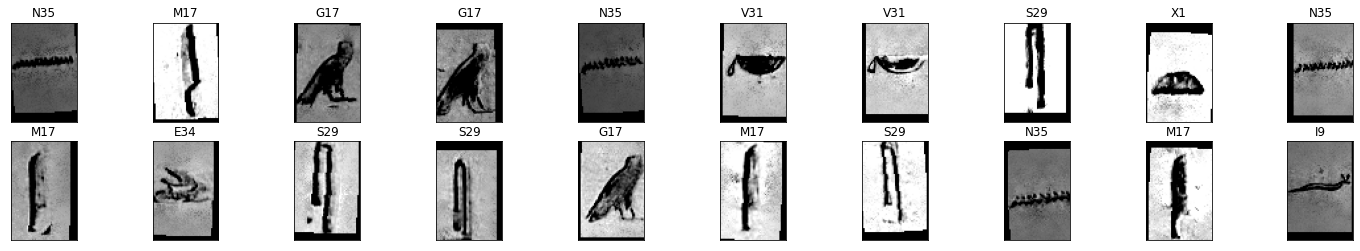

In [ ]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
# Load the pretrained model from pytorch
resnet152 = models.resnet152(pretrained=True)

# print out the model structure
print(resnet152)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
print(resnet152.fc.in_features) 
print(resnet152.fc.out_features) 

2048
1000


In [ ]:
# Freeze training for all "features" layers
for param in resnet152.parameters():
    param.requires_grad = False

In [ ]:
import torch.nn as nn

n_inputs = resnet152.fc.in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Sequential(
                nn.Linear(n_inputs, 1024),
                nn.ReLU(),
                nn.Linear(1024, 256),
                nn.ReLU(),
                nn.Linear(256, len(classes)))

resnet152.fc = last_layer

# if GPU is available, move the model to GPU
if train_on_gpu:
    resnet152.cuda()

# check to see that your last layer produces the expected number of outputs
# print(resnet152.fc.out_features)
#print(resnet152)

In [ ]:
# Initialize weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

resnet152.fc.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  after removing the cwd from sys.path.


Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=11, bias=True)
)

In [ ]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (Adam) and learning rate = 0.001
# Adam is better than SGD
optimizer = optim.SGD(resnet152.fc.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 80

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # model by default is set to train
    for batch_i, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = resnet152(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1, Batch 20 loss: 2.4305363297462463
Epoch 1, Batch 40 loss: 2.3455267786979674
Epoch 1, Batch 60 loss: 2.2354951024055483
Epoch 1, Batch 80 loss: 2.1569874882698059
Epoch 2, Batch 20 loss: 1.9895688951015473
Epoch 2, Batch 40 loss: 1.9212724924087525
Epoch 2, Batch 60 loss: 1.8119388043880462
Epoch 2, Batch 80 loss: 1.8171261847019196
Epoch 3, Batch 20 loss: 1.6855978727340699
Epoch 3, Batch 40 loss: 1.5585260391235352
Epoch 3, Batch 60 loss: 1.5119893610477448
Epoch 3, Batch 80 loss: 1.5178697586059571
Epoch 4, Batch 20 loss: 1.4591014623641967
Epoch 4, Batch 40 loss: 1.2951612114906310
Epoch 4, Batch 60 loss: 1.2604150831699372
Epoch 4, Batch 80 loss: 1.2538837045431137
Epoch 5, Batch 20 loss: 1.1526994824409484
Epoch 5, Batch 40 loss: 1.2429156184196473
Epoch 5, Batch 60 loss: 1.0991425365209579
Epoch 5, Batch 80 loss: 1.1001380205154419
Epoch 6, Batch 20 loss: 1.0101185292005539
Epoch 6, Batch 40 loss: 0.9468287587165832
Epoch 6, Batch 60 loss: 0.9533349841833114
Epoch 6, Ba

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

resnet152.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = resnet152(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(len(target.data)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.910048

Test Accuracy of   D21: 91% (34/37)
Test Accuracy of   E34: 96% (24/25)
Test Accuracy of   G17: 82% (32/39)
Test Accuracy of   G43: 92% (37/40)
Test Accuracy of    I9: 93% (28/30)
Test Accuracy of   M17: 93% (68/73)
Test Accuracy of   N35: 95% (86/90)
Test Accuracy of   O50: 100% (22/22)
Test Accuracy of   S29: 98% (52/53)
Test Accuracy of   V31: 96% (26/27)
Test Accuracy of    X1: 95% (45/47)

Test Accuracy (Overall): 93% (454/483)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

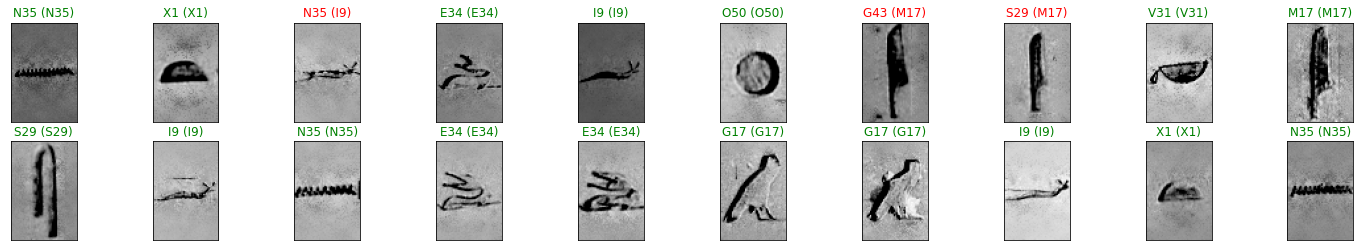

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = resnet152(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images.cpu()[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

Flower dataset
1.   Wide ResNet (epoch = 5, batch = 140)
> Loss: 0.86 | Test Accuracy: 79% (429/540)
2.   ResNet
> Loss: 0.67 | Test Accuracy: 83% (450/540)
3.   VGG
4.   SqueezeNet


